- import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import pickle


- Data collection and processing

In [2]:
df=pd.read_csv("bikedata.csv")

In [3]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand,Original Price
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,82500
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,230000
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,1100000
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,140000
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,150000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7312 entries, 0 to 7311
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bike_name       7312 non-null   object
 1   price           7312 non-null   int64 
 2   city            7312 non-null   object
 3   kms_driven      7312 non-null   int64 
 4   owner           7312 non-null   object
 5   age             7312 non-null   int64 
 6   power           7312 non-null   int64 
 7   brand           7312 non-null   object
 8   Original Price  7312 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 514.3+ KB


In [5]:
# checking null values
df.isnull().sum()

bike_name         0
price             0
city              0
kms_driven        0
owner             0
age               0
power             0
brand             0
Original Price    0
dtype: int64

In [6]:
# dropping the not important feature
df=df.drop(columns=['bike_name','city'])

In [7]:
df['year']=2026-df['age']
df.drop('age',errors='ignore',axis=1,inplace=True)

In [8]:
# setting the display format
pd.set_option('display.float_format', '{:.2f}'.format)

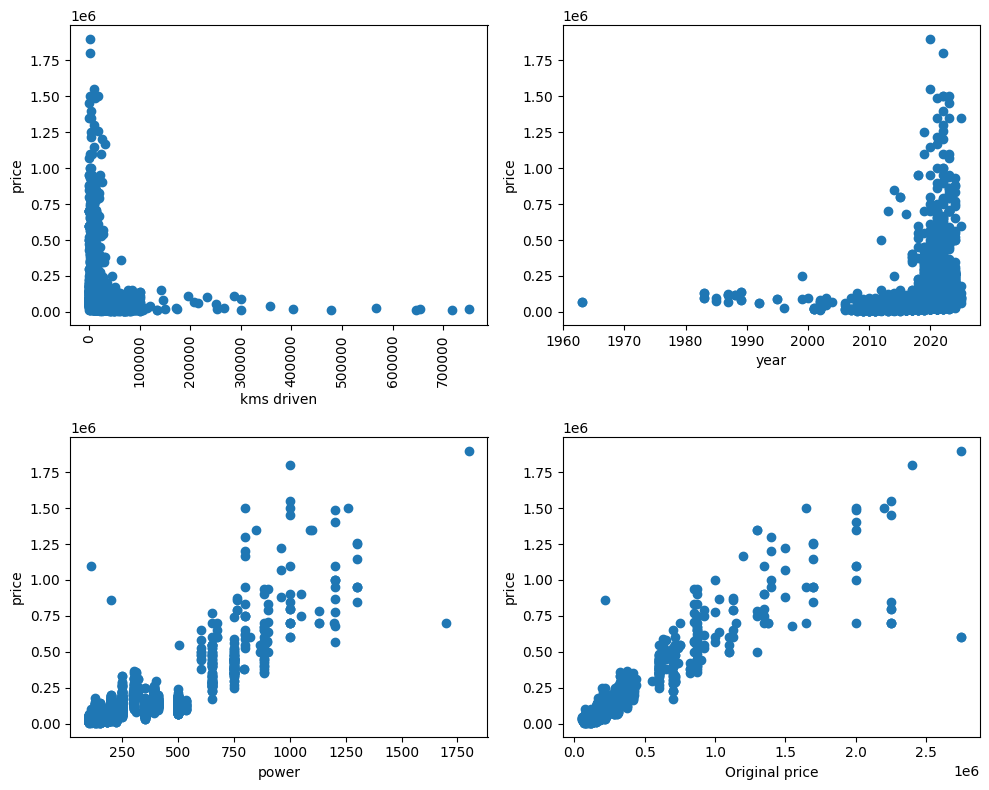

In [9]:
# data visualization
fig, ax = plt.subplots(2, 2,figsize=(10,8))

ax[0, 0].scatter(df['kms_driven'],df['price'])
ax[0,0].set_xlabel("kms driven")
ax[0,0].set_ylabel("price")
ax[0,0].tick_params(axis='x', rotation=90)


ax[0, 1].scatter(df['year'],df['price'])
ax[0,1].set_xlabel("year")
ax[0,1].set_ylabel("price")

ax[1, 0].scatter(df['power'],df['price'])
ax[1,0].set_xlabel("power")
ax[1,0].set_ylabel("price")


ax[1, 1].scatter(df['Original Price'],df['price'])
ax[1,1].set_xlabel("Original price")
ax[1,1].set_ylabel("price")


plt.tight_layout()
plt.show()

In [10]:
df.describe()

,price,kms_driven,power,Original Price,year
count,7312.00,7312.00,7312.00,7312.00,7312.00
mean,84951.45,23949.87,228.50,182339.31,2019.27
std,120751.85,27340.90,158.04,183545.42,3.86
min,4400.00,1.00,100.00,50000.00,1963.00
25%,30000.00,10148.50,125.00,90000.00,2018.00
50%,55000.00,19000.00,160.00,150000.00,2020.00
75%,100000.00,30396.75,350.00,215000.00,2022.00
max,1900000.00,750000.00,1800.00,2750000.00,2025.00


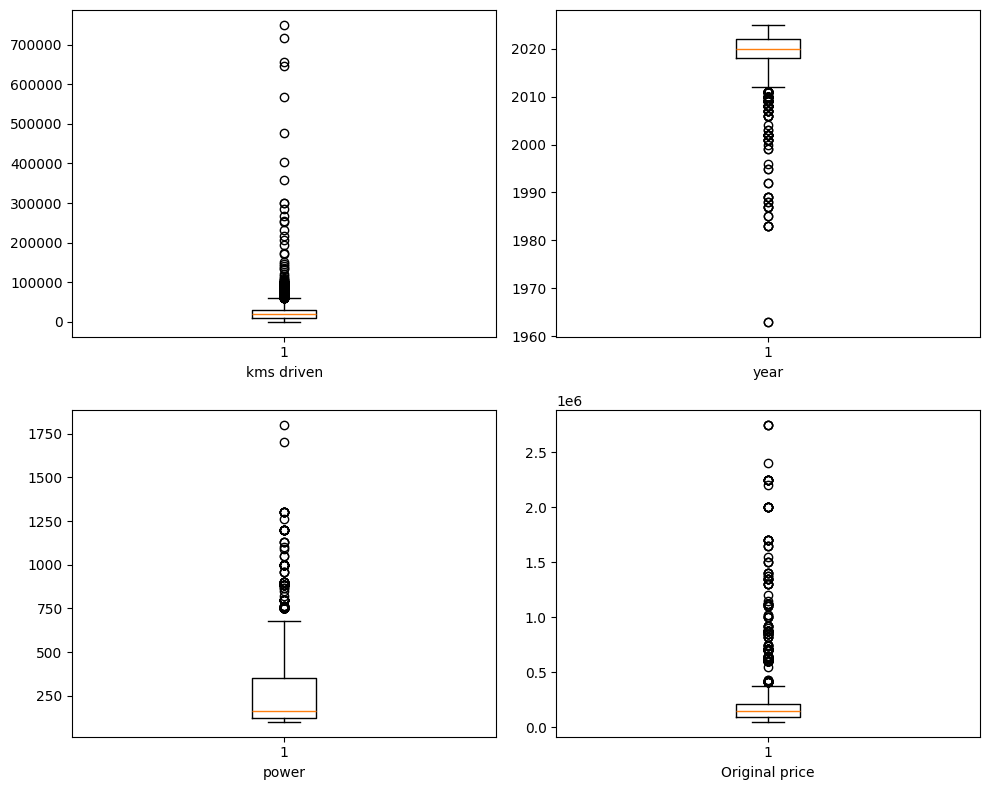

In [11]:
# checking outliers
fig, ax = plt.subplots(2, 2,figsize=(10,8))

ax[0, 0].boxplot(df['kms_driven'])
ax[0,0].set_xlabel("kms driven")



ax[0, 1].boxplot(df['year'])
ax[0,1].set_xlabel("year")


ax[1, 0].boxplot(df['power'])
ax[1,0].set_xlabel("power")



ax[1, 1].boxplot(df['Original Price'])
ax[1,1].set_xlabel("Original price")



plt.tight_layout()
plt.show()

In [12]:
df.shape

(7312, 7)

In [13]:
# Function to cap values
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['kms_driven', 'year', 'power', 'Original Price']:
    df = remove_outliers(df, col)


In [14]:
df.shape

(6550, 7)

- splitting the data into testing and training

In [15]:
x=df.drop('price',axis=1)
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

- pipeline and data preprocessing

In [16]:
num_feats=X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_feats=X_train.select_dtypes(include=['object']).columns.tolist()

# transformer
num_transformer=Pipeline([
    ('scaler',StandardScaler())
])

cat_transformer=Pipeline([
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])


In [17]:
# full pipeline:preprocessing + model

preprocessor=ColumnTransformer([
    ('num',num_transformer,num_feats),
    ('cat',cat_transformer,cat_feats)
])

model=Pipeline([
    ('preproc',preprocessor),
    ('regressor',LinearRegression())
])

- model training

In [18]:
model.fit(X_train,y_train)

,steps,"[('preproc', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


- model evaluation

In [25]:
y_train_pred=model.predict(X_train)
y_test_pred = model.predict(X_test)

def rmse(a,b):return np.sqrt(mean_squared_error(a,b))
k=len(X_train.columns)
def ad_r2_score(a, b, k):
    n=len(a)
    r2 = r2_score(a, b)
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Train Adjusted R²:", ad_r2_score(y_train, y_train_pred, k))
print("Train RMSE:", rmse(y_train, y_train_pred))
print()
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test Adjusted R²:", ad_r2_score(y_test, y_test_pred, k))
print("Test RMSE:", rmse(y_test, y_test_pred))

Train R²: 0.841242533538563
Train Adjusted R²: 0.8410605070148159
Train RMSE: 19714.08467653173

Test R²: 0.8722038889751672
Test Adjusted R²: 0.8716154187785832
Test RMSE: 16782.69696105154


- model deployment using pickle

In [21]:
# Save
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
